<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [106]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [109]:
df["car_age"] = 2022-df.Year

In [110]:
df.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,4
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,7
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,7
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,6
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,7


In [111]:
df.Car_Name.value_counts()
#too much unique values. It's not an important column. We should drop it.

city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
camry                 1
Suzuki Access 125     1
Hyosung GT250R        1
Honda Dream Yuga      1
vitara brezza         1
Name: Car_Name, Length: 98, dtype: int64

In [112]:
df.drop(columns=['Car_Name','Year'],inplace=True)

In [113]:
df.head(20)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
5,9.25,9.83,2071,Diesel,Dealer,Manual,0,4
6,6.75,8.12,18796,Petrol,Dealer,Manual,0,7
7,6.50,8.61,33429,Diesel,Dealer,Manual,0,7
8,8.75,8.89,20273,Diesel,Dealer,Manual,0,6
9,7.45,8.92,42367,Diesel,Dealer,Manual,0,7


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [114]:
df = pd.get_dummies(df,drop_first=True)

In [115]:
df.head(20)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
5,9.25,9.83,2071,0,4,1,0,0,1
6,6.75,8.12,18796,0,7,0,1,0,1
7,6.50,8.61,33429,0,7,1,0,0,1
8,8.75,8.89,20273,0,6,1,0,0,1
9,7.45,8.92,42367,0,7,1,0,0,1


### Features and target variable

In [116]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


##  Model Building (Linear Regression)

In [119]:
lm = LinearRegression()

In [120]:
lm.fit(X_train,y_train)

LinearRegression()

In [121]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [122]:
#Coeffiencent values for each feature
lm.coef_

array([ 4.29152503e-01, -6.15725866e-06, -9.03759824e-01, -3.53801365e-01,
        2.53327258e+00,  7.38464226e-01, -1.19059291e+00, -1.63902155e+00])

In [123]:
#B0 value
lm.intercept_

5.433437186715786

In [124]:
X_test

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.57,24000,0,6,0,1,1,0
289,13.60,10980,0,6,0,1,0,1
228,9.40,60000,0,10,1,0,0,1
198,0.57,35000,1,11,0,1,1,1
60,18.61,40001,0,9,0,1,0,1
...,...,...,...,...,...,...,...,...
234,5.70,4492,0,7,0,1,0,1
296,11.60,33988,0,6,1,0,0,1
281,7.60,50456,0,16,0,1,0,1
285,8.50,15059,0,6,0,1,0,0


In [125]:
y_pred

array([ 2.95534303,  8.178939  ,  6.45427257, -1.42417501,  9.08889914,
        7.41825441,  1.33644285,  0.84027217,  1.36501949,  7.49026806,
        9.11830017,  0.58573931,  8.41612774,  3.42316502,  6.90043281,
        3.04988309,  0.48448171, 10.70970753,  1.75207005,  2.34571752,
        0.39746889,  8.11925338,  6.62469317,  2.65939066,  0.78280554,
        3.69330765,  5.24815462,  2.82676351,  2.13640446,  1.75237686,
        0.39730155,  9.11750503, -0.66188053,  2.29098014,  8.57067341,
        4.4910324 ,  7.20530369,  7.53824015,  2.89101139,  7.93588794,
        3.93585154,  4.27133211,  4.33205704,  0.6008847 ,  7.34025071,
        0.47602539,  7.29187681, 11.23125597,  3.13805132,  5.38262985,
        6.7988422 ,  2.17888955, 20.63303305, 17.0015261 ,  7.50717349,
        9.69621308,  4.47478116,  8.97377615,  1.82294639,  7.60416734,
        0.22226536])

In [126]:
sum(X_test.loc[177] * lm.coef_) + lm.intercept_

2.955343034845745

# Interpret the model

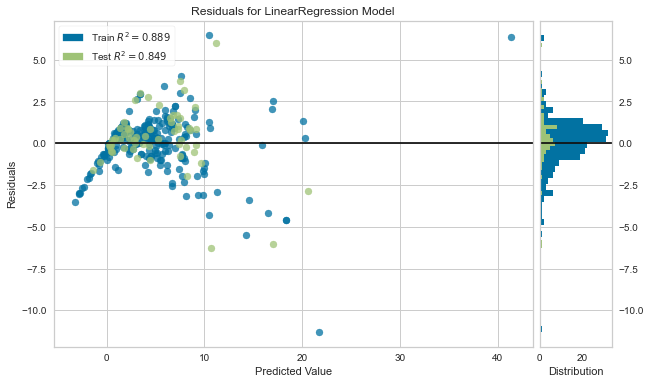

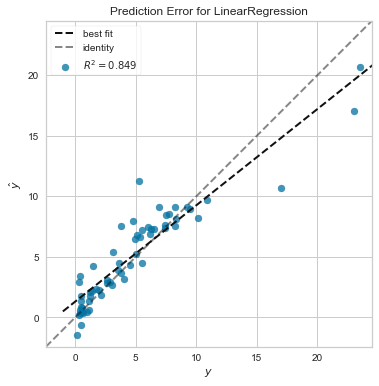

In [127]:
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure


# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Model Evaluation

In [128]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [129]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.848981302489908
MAE 		: 1.2162256821297002
MSE 		: 3.4788039706378715
RMSE 		: 1.865155213551374


In [130]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [131]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.35,2.955343,-2.605343
289,10.11,8.178939,1.931061
228,4.95,6.454273,-1.504273
198,0.15,-1.424175,1.574175
60,6.95,9.088899,-2.138899
...,...,...,...
234,5.50,4.474781,1.025219
296,9.50,8.973776,0.526224
281,2.10,1.822946,0.277054
285,7.40,7.604167,-0.204167


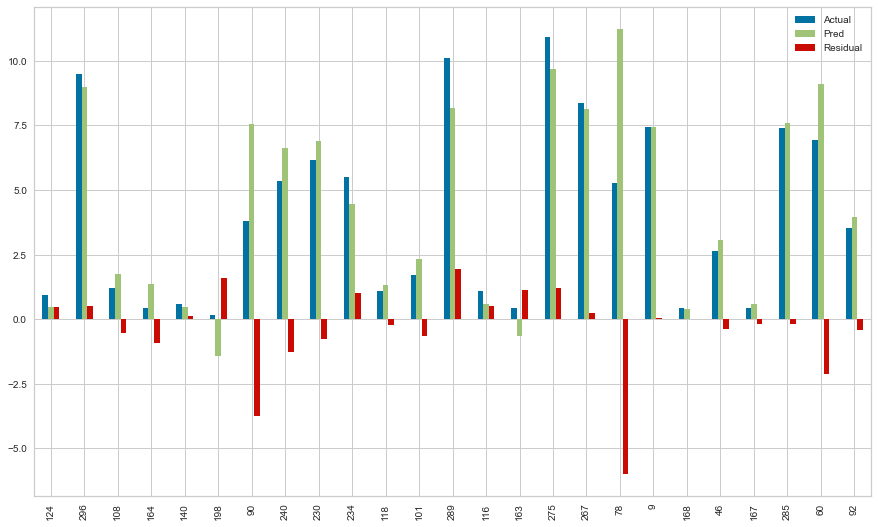

In [132]:
comparing.sample(25).plot(kind ="bar", figsize=(15,9))
plt.show()

# Regularization

# Ridge

In [133]:
ridge_model = Ridge(random_state=42)

In [134]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [135]:
ridge_model.alpha

1.0

In [136]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [137]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=5, scoring= 'neg_root_mean_squared_error')

In [138]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [139]:
ridge_cv_model.alpha_

0.01

In [140]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=10, scoring= 'neg_root_mean_squared_error')
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [141]:
ridge_cv_model.alpha_

1.0

In [142]:
ridge_cv_model.best_score_

-1.9537652700666004

In [143]:
y_pred = ridge_cv_model.predict(X_test)

In [144]:
y_pred

array([ 2.90131068,  8.1952302 ,  6.40362854, -1.36836337,  9.11434327,
        7.37421664,  1.35764312,  0.85271316,  1.38499155,  7.44607969,
        9.08100851,  0.60071291,  8.34504386,  3.36861757,  6.85083764,
        3.03819298,  0.49270168, 10.74458995,  1.77481436,  2.37104455,
        0.40643217,  8.07629357,  6.56908038,  2.63252558,  0.79863141,
        3.67832663,  5.25022673,  2.80620724,  2.16239525,  1.77597345,
        0.40715548,  9.08880963, -0.66078336,  2.26625138,  8.53615246,
        4.48417049,  7.22459399,  7.55266691,  2.87649418,  7.95169019,
        3.92278013,  4.18534026,  4.32050627,  0.61921745,  7.29366985,
        0.49000203,  7.30591698, 11.18954159,  3.11928402,  5.32267143,
        6.71982939,  2.20364164, 20.59580165, 16.93403212,  7.46800235,
        9.64016349,  4.46224828,  8.94008969,  1.79074242,  7.52985982,
        0.23400587])

In [145]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131487
MAE 		: 1.2114288537899955
MSE 		: 3.4527562364254356
RMSE 		: 1.8581593678760269


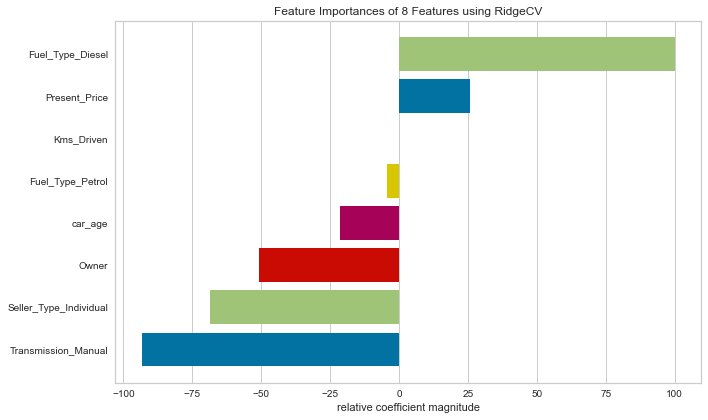

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [146]:
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [147]:
lasso_model = Lasso(alpha=1, random_state =42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=42)

In [148]:
y_pred = lasso_model.predict(X_test)

In [149]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7985538621024055
MAE 		: 1.4714179283504272
MSE 		: 4.640429535826081
RMSE 		: 2.154165624047065


In [150]:
lasso__cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter = 1000, random_state=42)

In [151]:
lasso__cv_model.fit(X_train,y_train)
y_pred = lasso__cv_model.predict(X_test)

In [152]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917956242985
MAE 		: 1.20764432704656
MSE 		: 3.4370982030172126
RMSE 		: 1.8539412620191646


In [153]:
lasso__cv_model.alpha_

0.01

In [154]:
lasso__cv_model.mse_path_[-1].mean()

3.963884373678188

## Elastic-Net 

In [155]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [156]:
y_pred = elastic_model.predict(X_test)

In [157]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8087884906376239
MAE 		: 1.4234255674689698
MSE 		: 4.404668885169283
RMSE 		: 2.098730303104542


# Final Model

In [158]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [159]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917956242985
MAE 		: 1.20764432704656
MSE 		: 3.4370982030172126
RMSE 		: 1.8539412620191646
